##  1. Prepare your workstation

In [2]:
# Copy the YAML file and your Twitter keys over to this Jupyter Notebook before you start to work
import yaml
from yaml.loader import SafeLoader
from twitter import *

# Import the yaml file - remember to specify the whole path and use / between directories
twitter_creds = yaml.safe_load(open('twitter.yaml', 'r').read())

In [3]:
# Pass your twitter credentials
twitter_api = Twitter(auth=OAuth(twitter_creds['access_token'],
                                 twitter_creds['access_token_secret'], 
                                 twitter_creds['api_key'],
                                 twitter_creds['api_secret_key'] ))

In [4]:
# See if you are connected
print(twitter_api)

## 2. Query Twitter for keyphrases

In [8]:
q = {'q':'Cheesecake', 'count':100, 'result_type':'recent'}

results = []

while len(results) < 30:
    query = twitter_api.search.tweets(**q)
    q['max_id'] = query['search_metadata']['next_results'].split('&')[0].split('?max_id=')[1]
    results.append(query)
    
# Determine the number of results
len(results) 

30

## 2. Create DataFrames

In [9]:
# Import pandas to join the DataFrames
import pandas as pd

# Concat DataFrames
results_list_pd = pd.concat([pd.DataFrame(_['statuses']) for _ in results])

# View shape of output
results_list_pd.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,retweeted_status,possibly_sensitive,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status
0,Fri Jun 10 09:39:24 +0000 2022,1535194914015051776,1535194914015051776,ましろ可愛いね,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,0,False,False,ja,NaN,NaN,NaN,NaN,NaN,NaN
1,Fri Jun 10 09:39:21 +0000 2022,1535194901591166976,1535194901591166976,RT @AilsaForshaw: When I make the 'Marry Me Ch...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,0,False,False,en,{'created_at': 'Tue Mar 05 17:50:22 +0000 2019...,NaN,NaN,NaN,NaN,NaN
2,Fri Jun 10 09:39:13 +0000 2022,1535194867877683201,1535194867877683201,@weiyinglovebot blueberry cheesecake,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.535195e+18,1535194564491091971,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
3,Fri Jun 10 09:39:13 +0000 2022,1535194867512401920,1535194867512401920,RT @nijisanji_app: 【#にじさんじジューンブライド2022 グッズ&amp...,False,"{'hashtags': [{'text': 'にじさんじジューンブライド2022', 'i...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,0,False,False,ja,{'created_at': 'Fri Jun 10 09:00:22 +0000 2022...,False,NaN,NaN,NaN,NaN
4,Fri Jun 10 09:39:13 +0000 2022,1535194867160055808,1535194867160055808,RT @AilsaForshaw: Peanut Butter Squares \nI ju...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,0,False,False,en,{'created_at': 'Sun Sep 30 01:32:12 +0000 2018...,NaN,NaN,NaN,NaN,NaN


## 3. Investigate tweets


In [12]:
# Import nltk and the required resources
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

In [14]:
# Look at one raw tweet
results_list_values[1]

"RT @AilsaForshaw: When I make the 'Marry Me Cheesecake' (what me jokingly calls mah' fave Cherry Cheesecake! lol!), I usually make it in th…"

#### 3.1 Breakdown each tweet into individual words using word_tokenize

In [15]:
# Split up each tweet into individual words
results_list_values_token = [word_tokenize(_) for _ in results_list_values]

#### 3.2 Get a list of all english words 

In [17]:
# Get a list of all english words so we can exclude anything that doesnt appear on the list
import nltk
nltk.download('words')

all_english_words = set(words.words())

#### 3.2b Pre-process results by:

a) converting all words to lower case
b) Only include alphanumeric words that are in the list of English words

In [18]:
# Some pre-processing:
#-- lets get every word
#-- lets convert it to lowercase
#-- only include if the word is alphanumeric and if it is in the list of English words.


results_list_values_token_nostop =\
[[y.lower() for y in x if y.lower() not in stop_words and y.isalpha() and y.lower() in all_english_words]\
 for x in results_list_values_token]

In [19]:
# Let's have a look at the same tweet as above
results_list_values_token_nostop[1]

['make', 'cheesecake', 'jokingly', 'cherry', 'cheesecake', 'usually', 'make']

# NLTK sentiment analysis 
### 1. Import NLTK

In [25]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hamdihassan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [26]:
# Import the vader classs and create a object of the analyzer called Darth Vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable to store the sia
sia = SentimentIntensityAnalyzer()

In [28]:
# Run through a dictionary comprehension to take every cleaned tweet 
# Next run the polarity score function on the string.
# This will return four values in a dictionary

results_list_values_token_nostop_polarity =\
{" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in results_list_values_token_nostop}

In [29]:
# Convert the list of dictionary results to a pandas dataframe. 
# The index is the cleaned tweet.
# We can see some of the highly positive words 

polarity_pd = pd.DataFrame(results_list_values_token_nostop_polarity).T

In [30]:
# Get the top 5 most positive cleaned tweets related to cheesecake
polarity_pd.sort_values('pos', ascending=0).head(5)

,neg,neu,pos,compound
winner,0.0,0.0,1.0,0.5859
cute,0.0,0.0,1.0,0.4588
love,0.0,0.0,1.0,0.6369
peaceful,0.0,0.0,1.0,0.4939
beautiful,0.0,0.0,1.0,0.5994


In [33]:
# Get the top 5 most negative words related to cheesecake
polarity_pd.sort_values('neg', ascending=0).head(5)

,neg,neu,pos,compound
slut,1.000,0.000,0.0,-0.5859
damn,1.000,0.000,0.0,-0.4019
sobbing,1.000,0.000,0.0,-0.3818
tired ass cheesecake,0.865,0.135,0.0,-0.7506
cheesecake killer,0.811,0.189,0.0,-0.6486


In [34]:
# The describe function on the compound will show the distribution and moments. 
# The average is 0.13 so slightly positive
polarity_pd['compound'].describe()

count    1449.000000
mean        0.138150
std         0.333886
min        -0.822500
25%         0.000000
50%         0.000000
75%         0.401900
max         0.938200
Name: compound, dtype: float64

In [ ]:
# Total number of results by sentiment

nega = polarity_pd[(polarity_pd['compound'] <= -0.05)].value_counts().sum()
posi = polarity_pd[(polarity_pd['compound'] >= 0.5)].value_counts().sum()
neut =  1449 - (nega + posi)

# Df containing the total results by sentiment
df = {'negative':  [nega],
        'positive': [posi],
        'neutral': [neut]}
sentiment  = pd.DataFrame(df)

sent_per = sentiment.T

# Percentage of results by sentiment
sent_per['percent'] = sent_per/1449*100
sent_per.rename(columns = {0:'count'}, inplace = True)

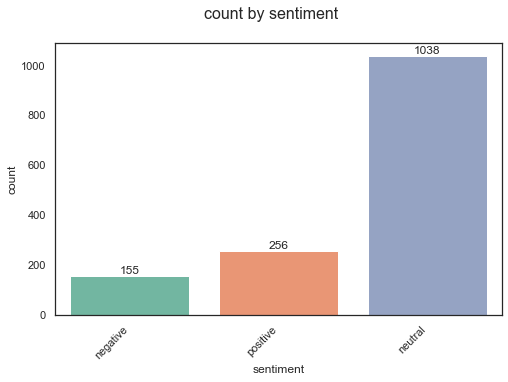

In [295]:
x = plt.figure(figsize=(8,5))
sns.set(style='white')


#create sns bar chart
x = sns.barplot(x='sentiment', y='count', data=sent_per, palette='Set2')
for i in x.containers:
    x.bar_label(i,)
    
    
# Plot asthetics
x = plt.suptitle("count by sentiment", fontsize=16)
x = var = plt.xticks(rotation=45,ha="right")


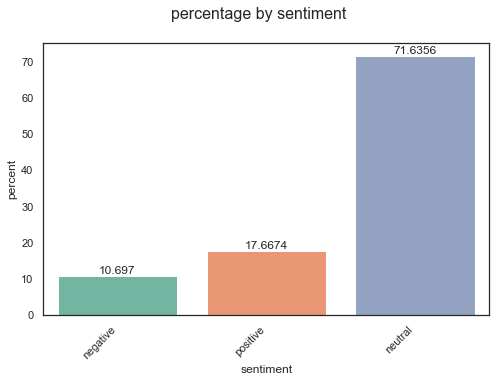

In [296]:
x = plt.figure(figsize=(8,5))
sns.set(style='white')


#create sns bar chart
x = sns.barplot(x='sentiment', y='percent', data=sent_per, palette='Set2')
for i in x.containers:
    x.bar_label(i,)
    
# Plot asthetics
x = plt.suptitle("percentage by sentiment", fontsize=16)
x = var = plt.xticks(rotation=45,ha="right")

## Notes:

1. The overall sentiment looks very slighlty positive at 0.13

2. However if we use pypi.org typical threshold for used to determine sentiment which is:

• Positive = compound score >= 0.05
• Neutral = compound score > -0.05) and (compound score < 0.05)
• Negative = compound score <= -0.05

  Then 0.13 would be considered neutral. 

3. This is supported by the two visualisations above which show that 71.6% of the data is neutral while only 17.6% is positive and 10.6% is negative.

These findings suggest that, at just 17.6% positvity, public sentiment does not favour the release of a new cheesecake flavoured chocolote bar.

However, I feel this data is not enough to make a recommendation as this is just a general review of peoples opinions on cheesecake on a given day rather than an indepth analysis of how people actually feel about cheesecake flavoured chocolate bars.